# Лаб 3: Злиття датафреймів, агрегування даних та візуалізація даних

### Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Завдання 1
Загрузити файл з даними про споживання енергії “En_In.xls”, який являє 
собою перелік показників енергозабезпечення та виробництва відновлюваної 
електроенергії, і ввести їх в DataFrame.

Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ
ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два 
стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також 
поміняти мітки стовпців так, щоб вони були такими:
```
['Country', 'Energy Supply', 'Energy Supply per Capita', '% 
Renewable]
```


In [204]:
df_energy = pd.read_excel(io='En_In.xls',
                          skiprows=17,
                          skipfooter=38,
                          usecols='C:F',
                          names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

df_energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669
1,Albania,102,35,100.000
2,Algeria,1959,51,0.551
3,American Samoa,...,...,0.641
4,Andorra,9,121,88.696
...,...,...,...,...
222,Viet Nam,2554,28,45.322
223,Wallis and Futuna Islands,0,26,0.000
224,Yemen,344,13,0.000
225,Zambia,400,26,99.715


## Завдання 2
Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж 
= 1000000 ГДж).

Для всіх країн, у яких відсутні дані (наприклад, дані з 
"....."), переконайтеся, що це відображається як значення `np.NaN`.

In [205]:
df_energy.replace("...", np.nan, inplace=True)
df_energy['Energy Supply'] = df_energy['Energy Supply'] * 1_000_000
pd.options.display.float_format = '{:.3f}'.format
df_energy

C:\Users\vadim\AppData\Local\Temp\ipykernel_23548\2440678447.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_energy.replace("...", np.nan, inplace=True)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
...,...,...,...,...
222,Viet Nam,2554000000.000,28.000,45.322
223,Wallis and Futuna Islands,0.000,26.000,0.000
224,Yemen,344000000.000,13.000,0.000
225,Zambia,400000000.000,26.000,99.715


## Завдання 4
Існує також декілька країн, що мають в назві цифри та/або дужки. 

Обов’язково видаліть їх, напр. `Bolivia (Plurinational State of)`
повинна бути `Bolivia`, `Switzerland17` повинна бути `Switzerland`.

In [206]:
# Видаляємо пробіли, текст у дужках та цифри в назвах країн
df_energy['Country'] = df_energy['Country'].replace(r'\s*\(.*\)|\d+', '', regex=True).str.strip()

df_energy.loc[df_energy['Country'].isin(['Bolivia', 'Switzerland'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
24,Bolivia,336000000.000,32.000,31.477
197,Switzerland,1113000000.000,136.000,57.745


## Завдання 3
Перейменуйте наступний список країн:
```
"Republic of Korea": "South Korea", 
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
"China, Hong Kong Special Administrative Region": "Hong Kong"
```

In [207]:
country_replace = {
    "Republic of Korea": "South Korea", 
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

# Використовуємо метод replace для заміни назв країн
df_energy['Country'] = df_energy['Country'].replace(country_replace)

df_energy.loc[df_energy['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,585000000.000,82.000,0.000
164,South Korea,11007000000.000,221.000,2.279
214,United Kingdom,7920000000.000,124.000,10.600
216,United States,90838000000.000,286.000,11.571


## Завдання 5
Далі, завантажте дані про ВВП з файлу `gpd.csv`, що містить дані 
Світового банку про ВВП країн від 1960 до 2015 року.

Обов’язково не включайте заголовок до датафрейму і перейменуйте 
наступний список країн:
```
"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran", 
"Hong Kong SAR, China": "Hong Kong"
```

In [208]:
df_gpd = pd.read_csv('gpd.csv', 
                     skiprows=4)

country_gpd_replace = {
    "Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran", 
    "Hong Kong SAR, China": "Hong Kong"
}

df_gpd.rename(columns={'Country Name': 'Country'}, inplace=True)

# Використовуємо метод replace для заміни назв країн
df_gpd['Country'] = df_gpd['Country'].replace(country_gpd_replace)

df_gpd.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


In [209]:
df_gpd.loc[df_gpd['Country'].isin(['South Korea', 'Iran', 'Hong Kong'])]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,17646914072.532,...,201916372094.710,214969758150.611,219544022644.222,214145185396.967,228637697575.040,239645861296.690,243720566257.359,251208086226.166,257775655510.280,263860579574.348
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,55008199861.362,60724056997.498,65526885363.193,70141337925.769,76085976411.740,89047763860.642,...,389552313541.270,425064554419.087,428990857822.095,438920754763.986,467790215915.476,485330901134.448,453256899727.832,444592553889.771,463902735245.890,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,27576960757.431,28938253834.678,29649660482.423,32475783404.666,34931355042.456,36744341227.481,...,941019882149.125,992431619676.197,1020509638539.710,1027729932849.170,1094499338702.720,1134795571930.640,1160809426196.790,1194429021591.570,1234340240503.490,1266580410309.110


## Завдання 6
Завантажте дані з файлу `scimagojr.xlsx`, який класифікує країни на основі 
їхніх публікацій в журналах у галузі енергетичного машинобудування та 
енергетичних технологій.

In [210]:
scimagojr = pd.read_excel(io='scimagojr.xlsx')
scimagojr.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57


## Завдання 7
Приєднайте три набори даних із завдань 1-6 до нового набору даних 
(використовуючи перетин назв країн).
 - Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і 
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
 - Індексом цього DataFrame повинна бути назва країни, а стовпцями мають 
бути 
```
['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% 
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
'2015']
```
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [211]:
# Знаходимо 15 найкращих країн за рейтингом Scimagoir
top_15_scimagoir_countries = scimagojr.loc[scimagojr['Rank'] <= 15]
top_15_scimagoir_countries

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
5,6,Canada,17899,17620,215003,40930,12.010,149
6,7,Germany,17027,16831,140566,27426,8.260,126
7,8,India,15005,14841,128763,37209,8.580,115
8,9,France,13153,12973,130632,28601,9.930,114
9,10,South Korea,11983,11923,114675,22595,9.570,104


In [212]:
# Об'єднуємо дані з топ-15 країн за рейтингом Scimagoir та дані про енергозабезпечення по перетину назв країн
df_top_15_scimagoir_energy = pd.merge(top_15_scimagoir_countries, df_energy, on='Country', how='left')
df_top_15_scimagoir_energy


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
0,1,China,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755
1,2,United States,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571
2,3,Japan,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233
3,4,United Kingdom,20944,20357,206091,37874,9.840,139,7920000000.000,124.000,10.600
4,5,Russian Federation,18534,18301,34266,12422,1.850,57,30709000000.000,214.000,17.289
5,6,Canada,17899,17620,215003,40930,12.010,149,10431000000.000,296.000,61.945
6,7,Germany,17027,16831,140566,27426,8.260,126,13261000000.000,165.000,17.902
7,8,India,15005,14841,128763,37209,8.580,115,33195000000.000,26.000,14.969
8,9,France,13153,12973,130632,28601,9.930,114,10597000000.000,166.000,17.020
9,10,South Korea,11983,11923,114675,22595,9.570,104,11007000000.000,221.000,2.279


In [213]:
# Вибираємо лише країни та дані про ВВП за останні 10 років (2006-2015)
df_gdp_years = df_gpd[['Country'] + [str(year) for year in range(2006, 2016)]]

# Об'єднуємо дані з рейтингом Scimagoir, енергозабезпеченням та ВВП по перетину назв країн
df_result = pd.merge(df_top_15_scimagoir_energy, df_gdp_years, on='Country', how='left')

# Встановлюємо 'Country' як індекс у фінальному DataFrame
df_result.set_index('Country', inplace=True)

df_result.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [214]:
df_result.shape

(15, 20)

## Завдання 8
Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
 
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній 
ВВП, відсортований за спаданням.

In [215]:
def task_eight(): 
    # Вибираємо лише стовпці з ВВП за роки 2006-2015
    gdp_columns = [str(year) for year in range(2006, 2016)]
    # Обчислюємо середнє значення ВВП по кожному рядку (по кожній країні) за роки 2006-2015
    # Сортуємо результат за спаданням
    result =  df_result[gdp_columns].mean(axis=1).sort_values(ascending=False)
    result.name = 'avgGDP'
    return result

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
Name: avgGDP, dtype: float64

## Завдання 9
 Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 
років для країни з 5-м середнім ВВП.

Ця функція повинна повертати кортеж із назвою країни та значенням, на 
яке змінився ВВП.

In [216]:
def task_nine():
    # Знаходимо країну з 5-м середнім ВВП
    fifth_country = task_eight().index[4]
    
    # Обчислюємо зміну ВВП між 2006 та 2015 роками для цієї країни
    gdp_change = df_result.loc[fifth_country, '2015'] - df_result.loc[fifth_country, '2006']
    
    # Повертаємо кортеж: назва країни та зміна ВВП
    return (fifth_country, gdp_change.item())

task_nine()


('France', 153345695364.24023)

## Завдання 10
Створіть функцію, щоб визначити, в якій країні встановлено максимум 
поновлюваних джерел енергії (% Renewable) та який саме відсоток.

Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [217]:
def task_ten():
    # Знаходимо країну з максимальним відсотком відновлювальних джерел енергії
    country = df_result['% Renewable'].idxmax()
    
    # Знаходимо максимальний відсоток відновлювальних джерел енергії
    max_renewable = df_result['% Renewable'].max().item()
    
    return (country, max_renewable)

task_ten()

('Brazil', 69.64803)

## Завдання 11
 Створіть стовпець, в якому оцінюється чисельність населення. Для 
пошуку оцінки використовуйте значення енергопостачання (Energy Supply) 
та енергопостачання на душу населення (Energy Supply per capita). Яка країна 
є шостою за цією оцінкою?

Ця функція повинна повертати кортеж із назвою країни та населенням



In [218]:
def task_eleven():
    # Створюємо стовпець для оцінки чисельності населення
    df_result['Population'] = df_result['Energy Supply'] / df_result['Energy Supply per Capita']
    
    # Сортуємо країни за оцінкою чисельності населення в порядку спадання та отримуємо країну, що займає 6 місце
    country_name = df_result['Population'].sort_values(ascending=False).index[5]
    
    # Отримуємо оцінку чисельності населення для цієї країни
    population = df_result.loc[country_name, 'Population'].item()
    
    return (country_name, population)

task_eleven()

('Japan', 127409395.97315437)

## Завдання 12
Створіть стовпець, в якому оцінюється кількість цитованих документів на 
одну особу. Який взаємозв'язок між кількістю цитованих документів на 
душу населення та енергозабезпеченням на душу населення? Використовуйте 
метод .corr () (кореляція Пірсона).

Ця функція повинна повертати одне число


In [219]:
def task_twelve():
    # Створюємо стовпець для оцінки кількості цитованих документів на одну особу
    df_result['Citable Documents per Capita'] = df_result['Citable documents'] / df_result['Population']
    
    # Обчислюємо кореляцію між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення
    correlation = df_result['Citable Documents per Capita'].corr(df_result['Energy Supply per Capita']).item()
    
    return correlation

task_twelve()

0.7940010435442946

## Завдання 13
Створіть новий стовпчик в який занесіть 1, якщо значення % 
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для 
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

Ця функція повинна повертати Series, індексом якого є назва країни, 
відсортована у порядку зростання Rank

In [220]:
def task_thirteen():
    # Знаходимо медіану по стовпцю '% Renewable'
    median_renewable = df_result['% Renewable'].median()
    
    # Створюємо новий стовпець, де 1, якщо значення >= медіани, 0 якщо < медіани
    df_result['Renewable Energy Median'] = (df_result['% Renewable'] >= median_renewable).astype(int)
    
    result = df_result[['Renewable Energy Median']]
    
    return result['Renewable Energy Median']

task_thirteen()


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Energy Median, dtype: int64

## Завдання 14
Використайте наступний словник, щоб згрупувати країни за 
континентами, потім створіть DataFrame, який відображає розмір вибірки 
(кількість країн на кожному континенті), а також суму, середнє та стандартне 
відхилення для оцінки кількості населення для кожної країни.
```
ContinentDict = {'China':'Asia',
 'United States':'North America',
 'Japan':'Asia',
 'United Kingdom':'Europe',
 'Russian Federation':'Europe',
 'Canada':'North America',
 'Germany':'Europe',
'India':'Asia',
 'France':'Europe',
 'South Korea':'Asia',
 'Italy':'Europe',
 'Spain':'Europe',
'Iran':'Asia',
 'Australia':'Australia',
 'Brazil':'South America'}
```
Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent 
`['Asia', 'Australia', 'Europe', 'North America', 'South America']` та стовпцями 
`['size', 'sum', 'mean', 'std ']`

In [221]:
ContinentDict = {'China': 'Asia',
                 'United States': 'North America',
                 'Japan': 'Asia',
                 'United Kingdom': 'Europe',
                 'Russian Federation': 'Europe',
                 'Canada': 'North America',
                 'Germany': 'Europe',
                 'India': 'Asia',
                 'France': 'Europe',
                 'South Korea': 'Asia',
                 'Italy': 'Europe',
                 'Spain': 'Europe',
                 'Iran': 'Asia',
                 'Australia': 'Australia',
                 'Brazil': 'South America'}
    
def task_forteen():
    # Додаємо стовпець "Continent" до df_result для відображення континенту кожної країни
    df_result['Continent'] = df_result.index.map(ContinentDict)
    
    # Групуємо дані за континентами і обчислюємо статистику для населення
    continent_stats = df_result.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    
    return continent_stats

task_forteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


## Завдання 15
Створіть бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). 

Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.

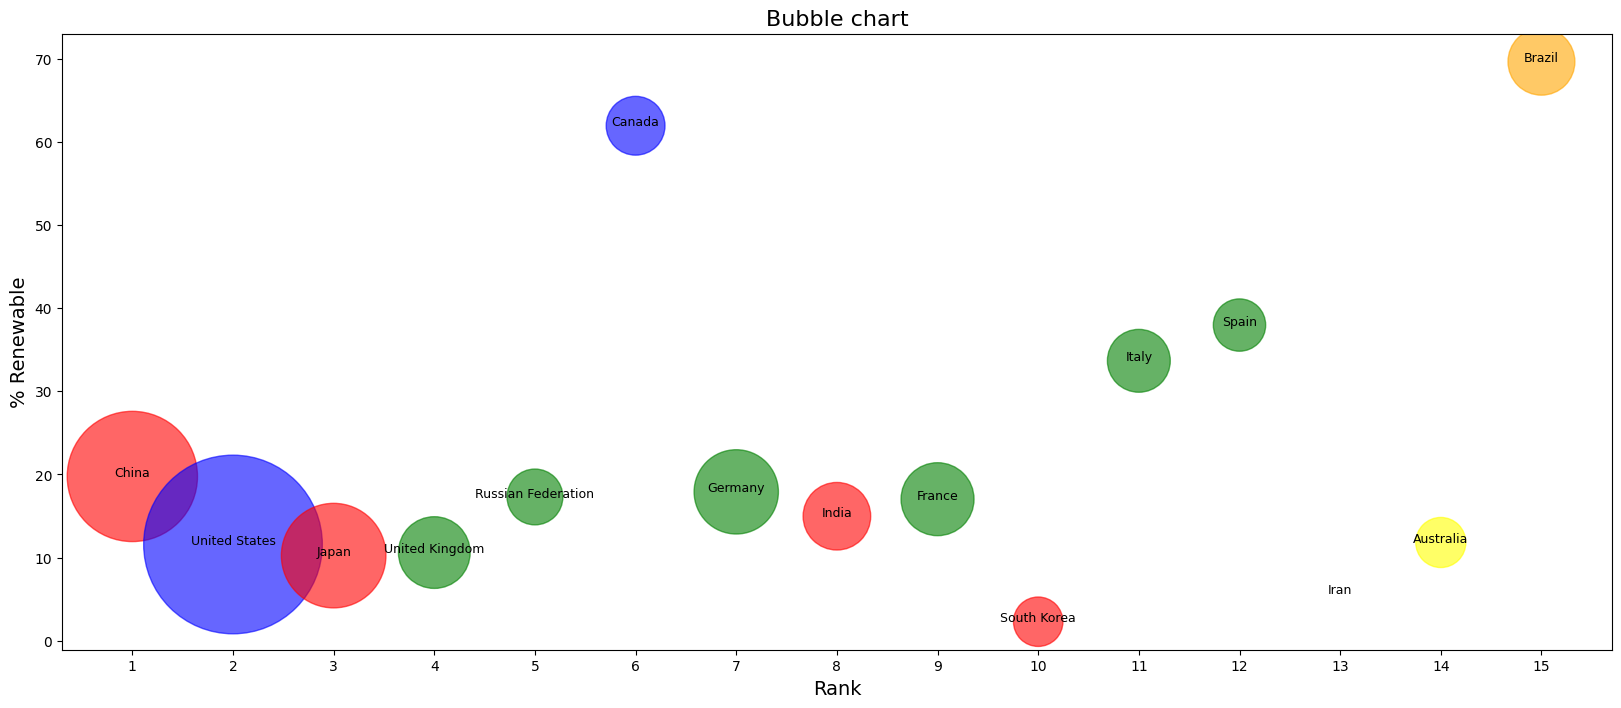

In [222]:
colors = {
    'Asia': 'red', 
    'North America': 'blue', 
    'Europe': 'green',
    'Australia': 'yellow', 
    'South America': 'orange'
}

# Додаємо стовпець "Continent" до df_result, щоб відобразити континент для кожної країни
df_result['Continent'] = df_result.index.map(ContinentDict)

# Призначаємо кольори для кожної країни відповідно до її континенту
continent_colors = df_result['Continent'].map(colors)

x_vals = df_result['Rank']
y_vals = df_result['% Renewable']
bubble_sizes = df_result['2015'] / 1e9

plt.figure(figsize=(20, 8))

# Створюємо бульбашкову діаграму
plt.scatter(x_vals, y_vals, s=bubble_sizes, c=continent_colors, alpha=0.6)

# Додаємо назви країн поруч з їхніми бульбашками
df_result.apply(lambda row: plt.text(row['Rank'], row['% Renewable'], 
                                     row.name, fontsize=9, ha='center'), axis=1)


plt.title('Bubble chart', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('% Renewable', fontsize=14)
plt.xticks(ticks=df_result['Rank'])

plt.show()